Let's generate some synthetic data for our example, Buddy!
Training a Logistic Regression model...
Model training complete!
Predicting probabilities on the test set...
Calculating ROC curve components...
ROC AUC: 0.94
Generating the ROC curve plot...


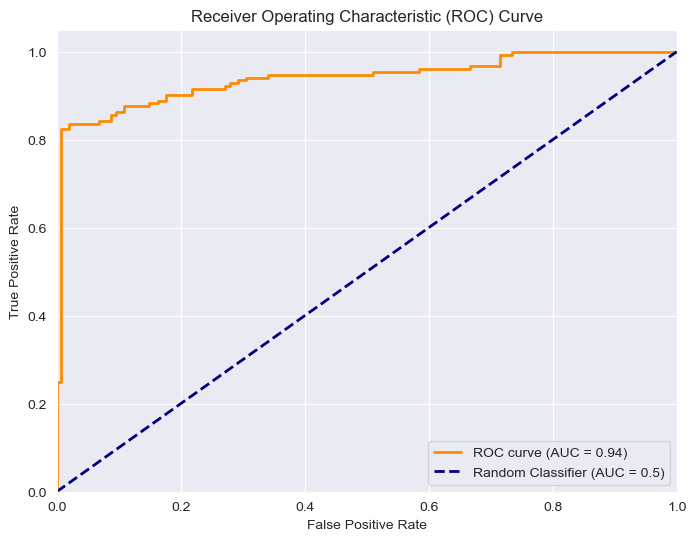


Explanation of the plot:
The orange curve shows our model's performance. The closer it is to the top-left corner, the better.
The dashed blue line represents a random classifier; our model should be significantly above this line.
The AUC value of 0.94 tells us how well our model distinguishes between the two classes. An AUC of 1 is perfect, while 0.5 is random.

Let's also look at an example prediction with a threshold:

First 10 actual values: [1 0 0 0 0 1 1 1 0 0]
First 10 predicted probabilities: ['0.93', '0.01', '0.25', '0.01', '0.01', '1.00', '0.02', '0.74', '0.05', '0.18']
First 10 predicted classes (threshold=0.5): [1 0 0 0 0 1 0 1 0 0]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification # For generating synthetic data

print("Let's generate some synthetic data for our example, Buddy!")

# Generate synthetic data for a classification problem
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training a Logistic Regression model...")
# Initialize and train a Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
print("Model training complete!")

print("Predicting probabilities on the test set...")
# Get predicted probabilities for the positive class (class 1)
y_prob = model.predict_proba(X_test)[:, 1] # We need probabilities for ROC curve

# Calculate FPR, TPR, and thresholds
print("Calculating ROC curve components...")
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)
print(f"ROC AUC: {roc_auc:.2f}")

# Plotting the ROC curve
print("Generating the ROC curve plot...")
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print("\nExplanation of the plot:")
print("The orange curve shows our model's performance. The closer it is to the top-left corner, the better.")
print("The dashed blue line represents a random classifier; our model should be significantly above this line.")
print(f"The AUC value of {roc_auc:.2f} tells us how well our model distinguishes between the two classes. An AUC of 1 is perfect, while 0.5 is random.")

print("\nLet's also look at an example prediction with a threshold:")
# Example of using a threshold (e.g., 0.5) to make binary predictions
threshold = 0.5
y_pred_thresholded = (y_prob >= threshold).astype(int)

# You can then compare y_pred_thresholded with y_test to see performance
# For instance, let's pick the first 10 predictions and actual values
print(f"\nFirst 10 actual values: {y_test[:10]}")
print(f"First 10 predicted probabilities: {[f'{p:.2f}' for p in y_prob[:10]]}")
print(f"First 10 predicted classes (threshold={threshold}): {y_pred_thresholded[:10]}")